In [1]:
import os
import numpy as np
import torch
from torch.utils.data import DataLoader
from torchvision.transforms import ToTensor, Normalize, Compose
from torch.optim import lr_scheduler

In [2]:
from scripts.mnistParity import MNISTParityVertical, MNISTParityHorizontal
from scripts.architecture import MLP
from scripts.train_utils import accuracy
from scripts.train import train_epoch, train_model, test_model
from scripts.plot_utils import plot_loss_accuracy

In [3]:
print(torch.__version__)

1.8.1+cu102


## Create Parity Data Iterator

### Vertical

In [4]:
transforms = Compose([
    ToTensor(),
    Normalize((0.1307,), (0.3081,))
])

In [ ]:
parityData2 = MNISTParityVertical(2, transforms = transforms)
parityData2.plotRandomData()

In [ ]:
trainloaderParity2 = DataLoader(parityData2.trainset, batch_size=128, shuffle=True)
testloaderParity2 = DataLoader(parityData2.testset, batch_size=128, shuffle=True)

### Neural Network Part

In [ ]:
inputShape0, inputShape1 = parityData2.trainset.data[0].shape
print(inputShape0 * inputShape1)

In [ ]:
learn_rate = 0.1 # for SGD
num_epochs = 20
loss_fn = torch.nn.CrossEntropyLoss()

In [ ]:
model = MLP(inputShape0,inputShape1)
optimizer = torch.optim.Adadelta(model.parameters(), lr=learn_rate, weight_decay = 0.01)

trainLostList, trainAccList, valLossList, valAccList  = train_model(model, trainloaderParity2, testloaderParity2, loss_fn, 
                                                                    optimizer, num_epochs, validate_model = True,
                                                                    performance=accuracy)


In [ ]:
test_model(model, testloaderParity2, loss_fn = loss_fn)

In [ ]:
plot_loss_accuracy(trainLostList,valLossList,trainAccList,valAccList,num_epochs)

### For k = 3

In [ ]:
parityData3 = MNISTParityVertical(3, transforms = transforms)

parityData3.plotRandomData()

trainloaderParity3 = DataLoader(parityData3.trainset, batch_size=128, shuffle=True)
testloaderParity3 = DataLoader(parityData3.testset, batch_size=1024, shuffle=True)

In [ ]:
inputShape0, inputShape1 = parityData3.trainset.data[0].shape
print(inputShape0 * inputShape1)
model2 = MLP(inputShape0, inputShape1)
optimizer = torch.optim.Adadelta(model2.parameters(), lr=learn_rate, weight_decay = 0.01)

trainLostList, trainAccList, valLossList, valAccList  = train_model(model2, trainloaderParity3, testloaderParity3, loss_fn, 
                                                                    optimizer, num_epochs, validate_model = True,
                                                                    performance=accuracy)

In [ ]:
plot_loss_accuracy(trainLostList,valLossList,trainAccList,valAccList,num_epochs)

### Try with Horizontal Data

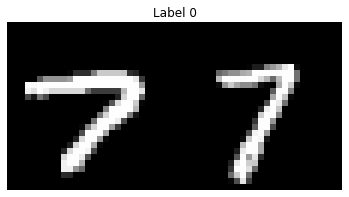

In [5]:
parityDataHor2 = MNISTParityHorizontal(2, transforms = transforms)
parityDataHor2.plotRandomData()

trainloaderParityHor2 = DataLoader(parityDataHor2.trainset, batch_size=128, shuffle=True)
testloaderParityHor2 = DataLoader(parityDataHor2.testset, batch_size=1024, shuffle=True)

In [6]:
inputShape0, inputShape1 = parityDataHor2.trainset.data[0].shape
print(inputShape0 * inputShape1)

learn_rate = 0.1 # for SGD
num_epochs = 20
loss_fn = torch.nn.CrossEntropyLoss()


model3 = MLP(inputShape0,inputShape1)
optimizer = torch.optim.Adadelta(model3.parameters(), lr=learn_rate, weight_decay = 0.01)

trainLostList, trainAccList, valLossList, valAccList  = train_model(model3, trainloaderParityHor2, testloaderParityHor2, loss_fn, 
                                                                    optimizer, num_epochs, validate_model = True,
                                                                    performance=accuracy)


1568
Training on cuda:0
Epoch 1 completed. Loss - total: 15058.9506 - average: 0.5020; Performance: 0.7429
TESTING - loss 2337.229479789734 - performance 0.7714
Epoch 2 completed. Loss - total: 11573.4427 - average: 0.3858; Performance: 0.8274
TESTING - loss 2238.252818107605 - performance 0.7908
Epoch 3 completed. Loss - total: 10018.7474 - average: 0.3340; Performance: 0.8582
TESTING - loss 2251.9710013866425 - performance 0.7972
Epoch 4 completed. Loss - total: 9005.6223 - average: 0.3002; Performance: 0.8753
TESTING - loss 2351.9309964179993 - performance 0.7842
Epoch 5 completed. Loss - total: 8417.3219 - average: 0.2806; Performance: 0.8881
TESTING - loss 1956.1476826667786 - performance 0.8264
Epoch 6 completed. Loss - total: 8019.1013 - average: 0.2673; Performance: 0.8932
TESTING - loss 1793.181035041809 - performance 0.8412
Epoch 7 completed. Loss - total: 7753.3925 - average: 0.2584; Performance: 0.8979
TESTING - loss 1751.5949292182922 - performance 0.8464
Epoch 8 completed

In [7]:
test_model(model3, testloaderParityHor2, loss_fn = loss_fn)

TESTING - loss 1852.711677789688 - performance 0.8356


(1852.711677789688, 0.8356)

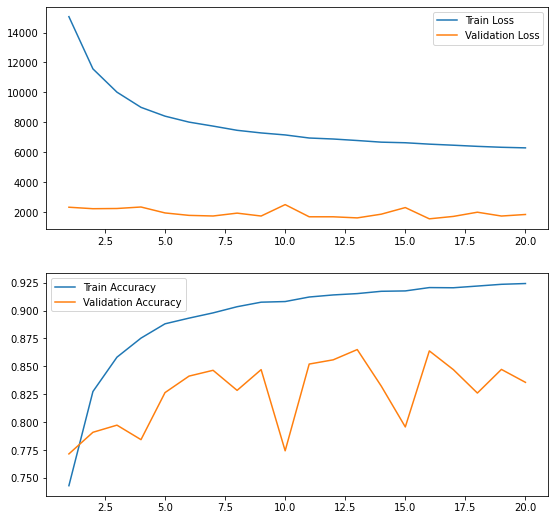

In [8]:
plot_loss_accuracy(trainLostList,valLossList,trainAccList,valAccList,num_epochs)

### For k = 3

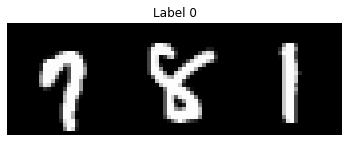

In [9]:
parityDataHor3 = MNISTParityHorizontal(3, transforms = transforms)
parityDataHor3.plotRandomData()

trainloaderParityHor3 = DataLoader(parityDataHor3.trainset, batch_size=128, shuffle=True)
testloaderParityHor3 = DataLoader(parityDataHor3.testset, batch_size=1024, shuffle=True)

In [10]:
inputShape0, inputShape1 = parityDataHor3.trainset.data[0].shape
print(inputShape0 * inputShape1)

learn_rate = 0.1 # for SGD
num_epochs = 20
loss_fn = loss_fn = torch.nn.CrossEntropyLoss()


model4 = MLP(inputShape0,inputShape1)
optimizer = torch.optim.Adadelta(model4.parameters(), lr=learn_rate, weight_decay = 0.05)
scheduler = lr_scheduler.ExponentialLR(optimizer, gamma=0.9)

trainLostList, trainAccList, valLossList, valAccList  = train_model(model4, trainloaderParityHor3, testloaderParityHor3, loss_fn, 
                                                                    optimizer, num_epochs, validate_model = True,
                                                                    performance=accuracy, device="cuda:0", lr_scheduler=scheduler)


2352
Training on cuda:0
Epoch 1 --- learning rate 0.10000
Epoch 1 completed. Loss - total: 13918.9467 - average: 0.6959; Performance: 0.5259
TESTING - loss 2328.152814209461 - performance 0.4809
Epoch 2 --- learning rate 0.09000
Epoch 2 completed. Loss - total: 13432.4955 - average: 0.6716; Performance: 0.5821
TESTING - loss 2238.153692781925 - performance 0.5860
Epoch 3 --- learning rate 0.08100
Epoch 3 completed. Loss - total: 12719.9236 - average: 0.6360; Performance: 0.6297
TESTING - loss 2172.3128892183304 - performance 0.6028
Epoch 4 --- learning rate 0.07290
Epoch 4 completed. Loss - total: 11927.7710 - average: 0.5964; Performance: 0.6785
TESTING - loss 2082.831866979599 - performance 0.6430
Epoch 5 --- learning rate 0.06561
Epoch 5 completed. Loss - total: 11295.4539 - average: 0.5648; Performance: 0.7038
TESTING - loss 2021.5152623653412 - performance 0.6544
Epoch 6 --- learning rate 0.05905
Epoch 6 completed. Loss - total: 10740.4842 - average: 0.5370; Performance: 0.7317
TE

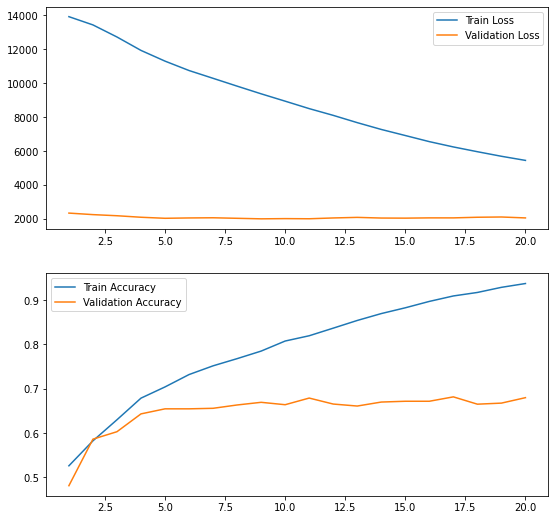

In [11]:
plot_loss_accuracy(trainLostList,valLossList,trainAccList,valAccList,num_epochs)

## TODO
* Questions:
    * Paper uses Hinge-loss, counterpart of this loss function is this one https://pytorch.org/docs/stable/generated/torch.nn.HingeEmbeddingLoss.html or do we need to write it?
    * Regularizaiton seems a bit different than L2, but it reminds it. Can I use weight_decay parameter in AdaDelta optimizer?